In [1228]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [1230]:
X1 = np.loadtxt('Matrice_Faillite_3ans.txt') #Toutes les banques qui n'ont pas survécu. Erreur de nom
X1

array([[2.50000000e+02, 3.91399994e+02],
       [3.18799988e+02, 4.73899994e+02],
       [7.20000000e+01, 2.53999996e+01],
       [7.20000000e+01, 2.86000004e+01],
       [4.50000000e+01, 2.31700001e+01],
       [1.50000000e+02, 9.50999985e+01],
       [1.25000000e+02, 3.12000008e+01],
       [1.31000000e+02, 7.30000000e+01],
       [3.00000000e+01, 9.34000015e+01],
       [3.00000000e+01, 1.46899994e+02],
       [3.20000000e+01, 3.35000000e+01],
       [1.00000000e+02, 1.57199997e+02],
       [1.00000000e+02, 1.34399994e+02],
       [1.00000000e+02, 8.98000031e+01],
       [5.00000000e+01, 0.00000000e+00],
       [5.00000000e+01, 0.00000000e+00],
       [4.00000000e+01, 9.25999985e+01],
       [4.00000000e+01, 1.33999996e+01],
       [2.50000000e+01, 4.75999985e+01],
       [2.50000000e+01, 1.01999998e+01],
       [6.00000000e+01, 4.09000015e+01],
       [1.00000000e+02, 1.09000000e+02],
       [5.00000000e+01, 1.36999998e+01],
       [7.50000000e+01, 1.73999996e+01],
       [2.160000

In [1231]:
X2 = np.loadtxt('Nouveau_Banks_Survie 138 bank Amr2.txt')
X2.shape

(276, 2)

In [1232]:
X2.shape

(276, 2)

In [1233]:
#X = np.vstack((X1,X2[:276]))
X = np.vstack((X1,X2))
X

array([[2.50000000e+02, 3.91399994e+02],
       [3.18799988e+02, 4.73899994e+02],
       [7.20000000e+01, 2.53999996e+01],
       ...,
       [2.00000000e+00, 1.10000000e+00],
       [3.50000000e+00, 3.00000000e-01],
       [3.50000000e+00, 4.20000000e+00]])

In [1234]:
X.shape

(552, 2)

In [1235]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 3.47798255,  1.57957946],
       [ 4.56969762,  1.95926585],
       [ 0.65348664, -0.10484739],
       ...,
       [-0.45727018, -0.21668228],
       [-0.43346825, -0.22036409],
       [-0.43346825, -0.20241528]])

In [1349]:
#Maintenant nous allons construire notre modèle neuronal grâce à cette fonction 
    
#Nous ferons un modèle neuronal séquentiel
model = Sequential() 

#Chacune va recevoir un nombre précis d'inputs. En l'occurrence, il s'agira ici du capital et du cash
model.add(Dense(80, input_dim = len(X[0, :]), activation = 'relu'))

#La deuxième couche (celle des neurones cachées) contiendra 6 neurones
model.add(Dense(30, activation = 'relu'))

#La dernière couche est celle de la dernière neurone qui donnera le résultat
#Comme nous travaillons sur un problème de classification, nous appelons la fonction sigmoïde
model.add(Dense(1, activation = 'sigmoid'))

print(model.summary()) #La fonction retournera un recapitulatif du modèle à la fin de la fonction

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_212 (Dense)           (None, 80)                240       
                                                                 
 dense_213 (Dense)           (None, 30)                2430      
                                                                 
 dense_214 (Dense)           (None, 1)                 31        
                                                                 
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________
None


In [1350]:
#Nous compilons notre modèle en fonction de notre problème
#La valeurs de ces paramètres correspond à un problème classique de classification

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [1351]:
#Maintenant on créera les matrices Y pour chaque matrice

Y1 = np.loadtxt('MatriceY_Faillite_3ans.txt')
Y1 = Y1.reshape(Y1.shape[0], 1)

Y2 = np.zeros((276, 1))
Y2

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [1352]:
Y = np.vstack((Y1,Y2))
Y.shape

(552, 1)

In [1353]:
Y1.shape

(276, 1)

In [1397]:
X1_plot = np.zeros((138, 2))
X2_plot = np.zeros((138, 2))

Y1_plot = np.zeros((138, 1))
Y2_plot = np.zeros((138, 1))

n=0
m=0
for i in range(X1.shape[0]):
        if i%2==0:
            X1_plot[n]= X1[i]

            Y1_plot[n] = Y1[i]
            n=n+1

In [1399]:
for i in range(138, 276):
        if i%2==0:
            X2_plot[m]= X2[i]

            Y2_plot[m] = Y2[i]
            m=m+1

X2_plot.shape[1]

2

In [ ]:
#X2_plot[]

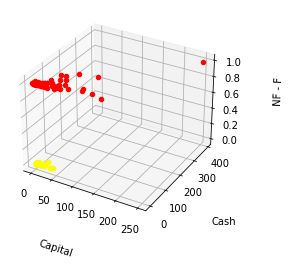

In [1405]:
from sklearn.model_selection import train_test_split

ax=plt.axes(projection='3d')

for i in range(X1_plot.shape[0]):
    ax.scatter(X1_plot[i][0], X1_plot[i][1], 1, color = 'red')
    ax.scatter(X2_plot[i][0], X2_plot[i][1], 0, color = 'yellow')

ax.set_xlabel('Capital', labelpad=20)
ax.set_ylabel('Cash', labelpad=20)
ax.set_zlabel('NF - F', labelpad=20)

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 28)
X_train

In [1357]:
#A partir d'ici, on va entraîner notre modèle
#On va utiliser 5 banques pour l'entraînement et 3 banques pour le test
#Comme on vient de voir, 2 banques ont un problème de normalisation. Par conséquent, elle ne seront pas utilisées dans nos tests

model.fit(x=X_train, y=y_train, batch_size = 10, epochs = 1000, verbose = 1)

Epoch 1/1000
47/47 [==============================] - 6s 3ms/step - loss: 0.6257 - accuracy: 0.7420
Epoch 2/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5805 - accuracy: 0.7420
Epoch 3/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.5738 - accuracy: 0.7420
Epoch 4/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.5710 - accuracy: 0.7420
Epoch 5/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5709 - accuracy: 0.7420
Epoch 6/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.5690 - accuracy: 0.7420
Epoch 7/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.5666 - accuracy: 0.7420
Epoch 8/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5664 - accuracy: 0.7420
Epoch 9/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.5643 - accuracy: 0.7420
Epoch 10/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5642 - accuracy: 0.7420

In [1358]:
eval_model=model.evaluate(X_train, y_train)

15/15 [==============================] - 21s 4ms/step - loss: 0.4978 - accuracy: 0.7612


In [1359]:
#Maintenant on va évaluer notre modèle entraîné pour nos 3 banques qui restent

prediction = model.predict(X_test)

3/3 [==============================] - 22s 17ms/step


In [1360]:
prediction[:15]

array([[2.9221809e-01],
       [5.2303392e-01],
       [3.2667118e-01],
       [2.8035671e-01],
       [3.5798496e-01],
       [5.8987836e-04],
       [2.9508790e-01],
       [2.9455039e-01],
       [2.2570893e-01],
       [7.1416694e-01],
       [2.4995337e-01],
       [1.9966424e-01],
       [2.4573898e-01],
       [2.2179766e-01],
       [2.1046915e-03]], dtype=float32)

In [1361]:
prediction = prediction.round()
prediction.sum()

7.0

In [1362]:
#Maintenant on va mesurer la précision du modèle en le comparant aux valeurs réelles des Y de chaque matrice

my_accuracy = accuracy_score(y_test, prediction.round())
print(my_accuracy)

0.7349397590361446


In [1363]:
y_test

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],

In [1364]:
prediction

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [1365]:
precision = precision_score(y_test, prediction.round())
precision

0.14285714285714285

In [1366]:
prediction.sum()/y_test.sum()

0.4117647058823529

In [1367]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, prediction.round())
print(cm)

[[60  6]
 [16  1]]


In [1368]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [1369]:
cm_plot_labels = ['NF','F']

Confusion matrix, without normalization
[[60  6]
 [16  1]]


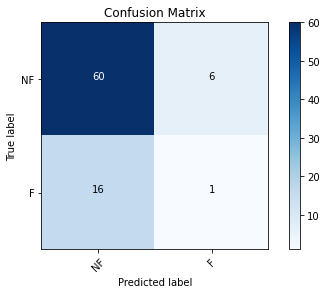

In [1370]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [1371]:
y_test.shape

(83, 1)

In [1372]:
117/166

0.7048192771084337